In [474]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [475]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [476]:
##Step 1: Reading data

In [477]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [478]:
##Step 2: Inspecting the dataframe

In [479]:
df.shape

(9240, 37)

In [480]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [482]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [483]:
##Step 2 : checking for null values

In [484]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [485]:
##Dropping values which have more than 3000 values

In [486]:
columns_to_remove = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','Tags']
df = df.drop(columns=columns_to_remove)

In [487]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [488]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [489]:
## Columns city and country are not required, hence we can drop these as well
columns_to_remove = ['City','Country']
df = df.drop(columns=columns_to_remove)

In [490]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [491]:
### There were columns which had value as 'Select' which means that student had not selected any option and hence these needs to be checked as these are as good as null values
## Identified 3 columns which have 'Select' values as shown below

In [492]:
df['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [493]:
df['Specialization'].astype('category').value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [494]:
df['How did you hear about X Education'].astype('category').value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [495]:
#As per above data, Lead Profile and How did you hear about X Education has more select values and hence we can drop these
columns_to_remove = ['Lead Profile','How did you hear about X Education']
df = df.drop(columns=columns_to_remove)

In [496]:
## We can also drop the below columns as these do not provide us much information and are unnecessary for analysis
columns_to_remove = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Do Not Email','What is your current occupation''Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
         'Update me on Supply Chain Content', 'Get updates on DM Content', 'What matters most to you in choosing a course',
            'I agree to pay the amount through cheque']

In [497]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [498]:
df = df[~pd.isnull(df['What is your current occupation'])]

In [499]:
df.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      130
Total Time Spent on Website                        0
Page Views Per Visit                             130
Last Activity                                    103
Specialization                                    18
What is your current occupation                    0
What matters most to you in choosing a course     19
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

In [500]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [501]:
df.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Converted                                          0
TotalVisits                                      130
Total Time Spent on Website                        0
Page Views Per Visit                             130
Last Activity                                    103
Specialization                                    18
What is your current occupation                    0
What matters most to you in choosing a course     19
A free copy of Mastering The Interview             0
Last Notable Activity                              0
dtype: int64

In [502]:
df = df[~pd.isnull(df['TotalVisits'])]
df.isnull().sum()

Prospect ID                                       0
Lead Number                                       0
Lead Origin                                       0
Lead Source                                      29
Do Not Email                                      0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Last Activity                                     0
Specialization                                   18
What is your current occupation                   0
What matters most to you in choosing a course    19
A free copy of Mastering The Interview            0
Last Notable Activity                             0
dtype: int64

In [503]:
df = df[~pd.isnull(df['Lead Source'])]
df.isnull().sum()

Prospect ID                                       0
Lead Number                                       0
Lead Origin                                       0
Lead Source                                       0
Do Not Email                                      0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Last Activity                                     0
Specialization                                   18
What is your current occupation                   0
What matters most to you in choosing a course    19
A free copy of Mastering The Interview            0
Last Notable Activity                             0
dtype: int64

In [504]:
df = df[~pd.isnull(df['Specialization'])]
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    1
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

In [505]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,Modified


In [506]:
df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [507]:
##Step 3: Preparing data 

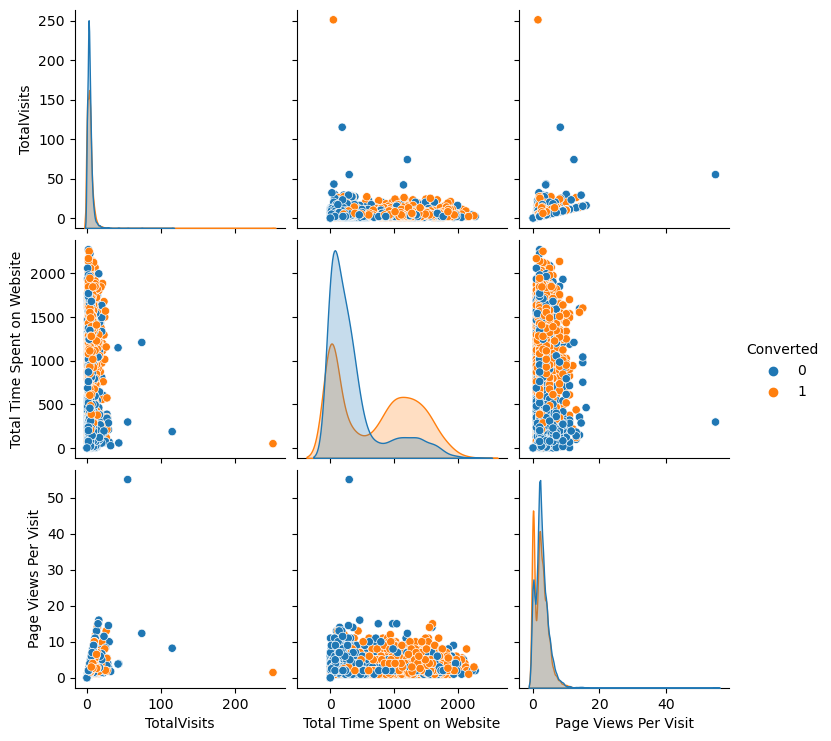

In [508]:
sns.pairplot(df,diag_kind='kde',hue='Converted')
plt.show()

In [509]:
##Dummy Variable Creation

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6373 non-null   object 
 1   Lead Source                                    6373 non-null   object 
 2   Do Not Email                                   6373 non-null   object 
 3   Converted                                      6373 non-null   int64  
 4   TotalVisits                                    6373 non-null   float64
 5   Total Time Spent on Website                    6373 non-null   int64  
 6   Page Views Per Visit                           6373 non-null   float64
 7   Last Activity                                  6373 non-null   object 
 8   Specialization                                 6373 non-null   object 
 9   What is your current occupation                6373 non-n

In [511]:
# dummy encoding for the categorical variables
dummies = pd.get_dummies(df.select_dtypes(include=['object']), drop_first=True,dtype=int)


df_dummy = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
df_dummy= pd.concat([df_dummy, dummies], axis=1)

df_dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [512]:
print(f"{round(len(df_dummy)/9239*100,2)}% data has been retained after data cleaning.")


68.98% data has been retained after data cleaning.


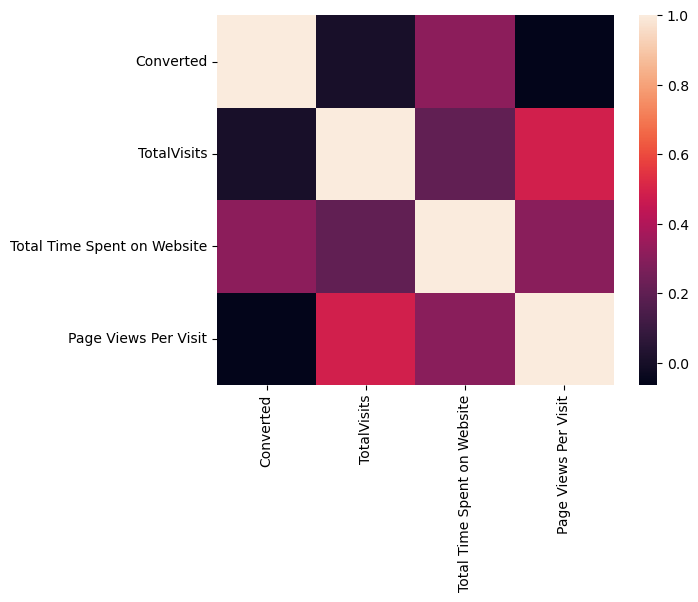

In [513]:
### EDA
##Correlations
sns.heatmap(df_dummy[df_dummy.columns[:4]].corr())
plt.show()

In [514]:
##Univariate Analysis

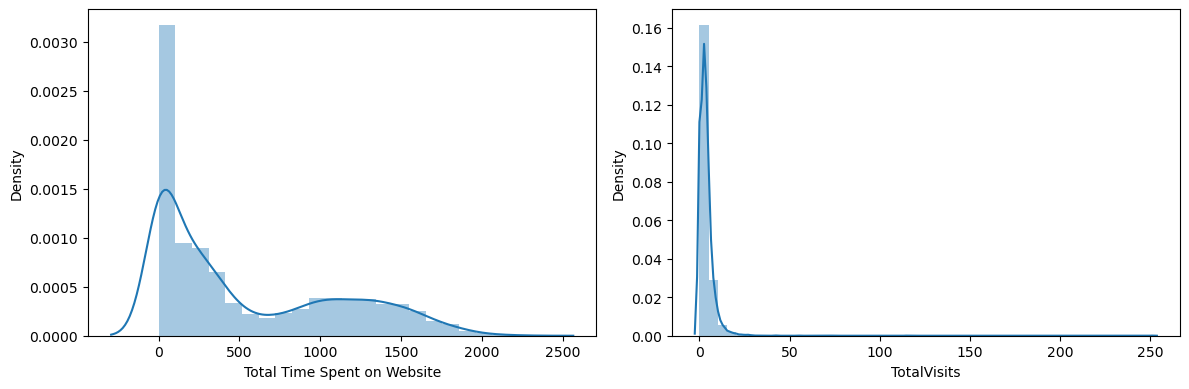

In [515]:
#Histogram
def plot_bars():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.distplot(df_dummy['Total Time Spent on Website'])

    plt.subplot(122)
    sns.distplot(df_dummy['TotalVisits'])

    plt.tight_layout()
    plt.show()
    
plot_bars()

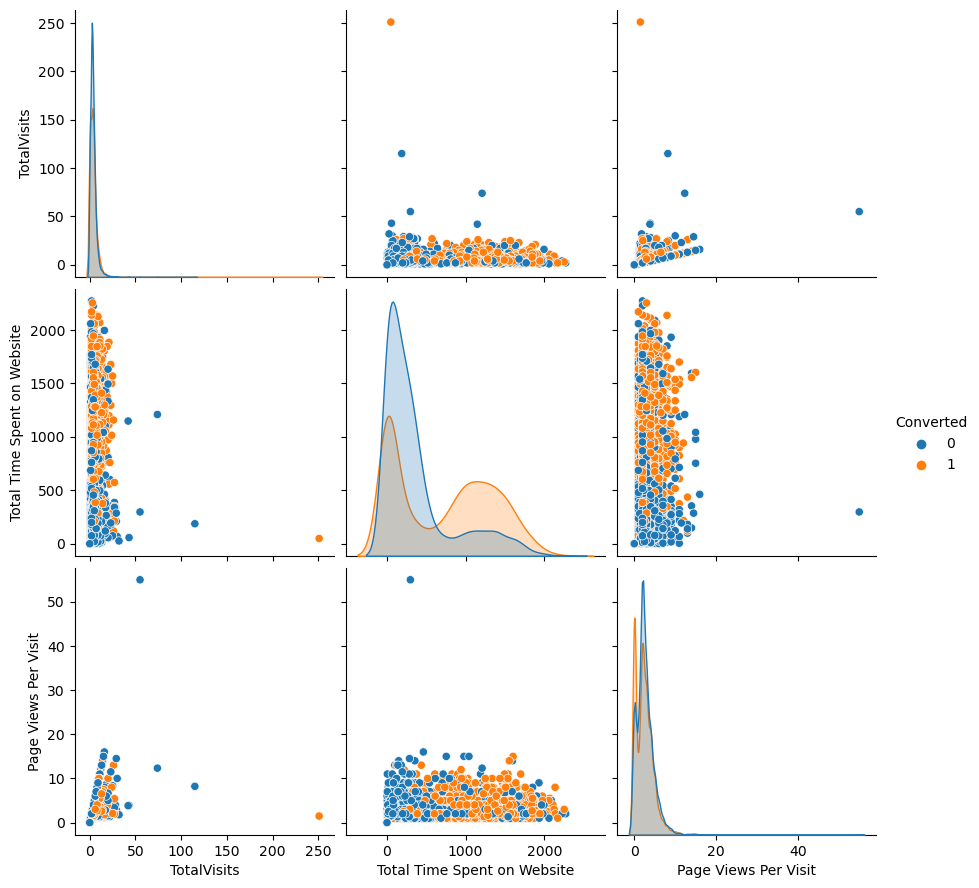

In [516]:
##Bivariate Analysis
sns.pairplot(data=df_dummy, vars=df_dummy.columns[1:4], hue='Converted',height=3,)
plt.show()

In [517]:
##Step 4: Test-Train Split

In [518]:
df_dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [519]:
# Put all the feature variables in X

X = df_dummy.drop(['Converted'],axis= 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [520]:
# Put the target variable in y

y = df_dummy['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [521]:
X.shape

(6373, 76)

In [522]:
y.shape

(6373,)

In [523]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [524]:
##Scaling 

In [525]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [526]:
##Step 5:Building the model
logreg = LogisticRegression()

In [527]:
#Selecting 15 features using RFE
rfe = RFE(logreg,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [528]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Social Media', False, 62),
 ('Lead Source_WeLearn', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 21),
 ('Lead Source_testone', False, 31),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link 

In [529]:
# Including all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [530]:
X_train = X_train[col]

In [531]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.2
Date:                Mon, 22 Jul 2024   Deviance:                       4134.4
Time:                        15:56:46   Pearson chi2:                 4.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3676
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.2343      2.636      3.882      0.000       5.068      15.401
Total Time Spent on Website                              4.4045      0.186     23.735      0.000       4.041       4.768
Lead Origin_Lead Add Form                                4.2361      0.259     16.363      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6324      0.133     12.267      0.000       1.372       1.893
Lead Source_Welingak Website                             2.3444      1.038      2.258      0.024       0.310       4.379
Do Not Email_Yes                                        -1.5177      0.192     -7.892      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   1.1713      0.987      1.186      0.235      -0.764       3.106
Last Activity_SMS Sent                                   1.1787      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3400      0.098     -3.464      0.001      -0.532      -0.148
What is your current occupation_Housewife               22.6104   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1260      0.634     -1.776      0.076      -2.369       0.117
What is your current occupation_Unemployed              -1.2968      0.598     -2.169      0.030      -2.468      -0.125
What is your current occupation_Working Professional     1.2483      0.627      1.992      0.046       0.020       2.476
Last Notable Activity_Had a Phone Conversation          23.0106   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7670      0.807      3.429      0.001       1.186       4.348
========================================================================================================================
"""

In [532]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.13
6,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.39
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.71
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [533]:
##The VIFs are all less than 5. So let's drop the ones with the high p-values which is Last Notable Activity_Had a Phone Conversation
# and What is your current occupation_Housewife and Last Activity_Had a Phone Conversation
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [534]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [535]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [536]:
##Re-fit the model
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.6
Date:                Mon, 22 Jul 2024   Deviance:                       4161.2
Time:                        15:56:47   Pearson chi2:                 4.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3637
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4079      0.556     -0.734      0.463      -1.497       0.681
TotalVisits                                             10.5735      2.650      3.989      0.000       5.379      15.768
Total Time Spent on Website                              4.3809      0.185     23.705      0.000       4.019       4.743
Lead Origin_Lead Add Form                                4.2251      0.259     16.328      0.000       3.718       4.732
Lead Source_Olark Chat                                   1.6195      0.133     12.198      0.000       1.359       1.880
Lead Source_Welingak Website                             2.3469      1.038      2.261      0.024       0.312       4.382
Do Not Email_Yes                                        -1.5311      0.192     -7.960      0.000      -1.908      -1.154
Last Activity_SMS Sent                                   1.1626      0.082     14.148      0.000       1.002       1.324
Specialization_Select                                   -0.3437      0.098     -3.514      0.000      -0.535      -0.152
What is your current occupation_Student                 -1.6577      0.591     -2.807      0.005      -2.815      -0.500
What is your current occupation_Unemployed              -1.8168      0.552     -3.293      0.001      -2.898      -0.736
What is your current occupation_Working Professional     0.7263      0.582      1.247      0.212      -0.415       1.868
Last Notable Activity_Unreachable                        2.7429      0.807      3.399      0.001       1.161       4.325
========================================================================================================================
"""

In [537]:
##What is your current occupation_Working Professional also seems to be high, lets drop this as well
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [538]:
##Re-fit the model
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.3
Date:                Mon, 22 Jul 2024   Deviance:                       4162.6
Time:                        15:56:47   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3635
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2509      0.196      1.282      0.200      -0.133       0.634
TotalVisits                                   10.4622      2.643      3.958      0.000       5.281      15.643
Total Time Spent on Website                    4.3815      0.185     23.705      0.000       4.019       4.744
Lead Origin_Lead Add Form                      4.2245      0.259     16.330      0.000       3.717       4.732
Lead Source_Olark Chat                         1.6196      0.133     12.205      0.000       1.359       1.880
Lead Source_Welingak Website                   2.3460      1.038      2.260      0.024       0.311       4.381
Do Not Email_Yes                              -1.5286      0.192     -7.950      0.000      -1.905      -1.152
Last Activity_SMS Sent                         1.1658      0.082     14.205      0.000       1.005       1.327
Specialization_Select                         -0.3448      0.098     -3.526      0.000      -0.536      -0.153
What is your current occupation_Student       -2.3154      0.282     -8.205      0.000      -2.869      -1.762
What is your current occupation_Unemployed    -2.4749      0.187    -13.256      0.000      -2.841      -2.109
Last Notable Activity_Unreachable              2.7435      0.807      3.399      0.001       1.162       4.325
==============================================================================================================
"""

In [539]:
## All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.
## Lets check VIF now


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.25
1,Total Time Spent on Website,2.01
7,Specialization_Select,1.90
3,Lead Source_Olark Chat,1.56
0,TotalVisits,1.55
6,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.34
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.08


In [540]:
##Assesing the model with StatsModel
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.318150
218     0.154896
4171    0.139009
4037    0.279035
3660    0.959546
207     0.158420
2044    0.145542
6411    0.949938
6498    0.079500
2085    0.982044
dtype: float64

In [541]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3181503 , 0.15489628, 0.13900923, 0.27903527, 0.95954603,
       0.15842007, 0.14554154, 0.94993845, 0.07950019, 0.98204412])

In [542]:
##Creating a dataframe with actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.318150
1,0,0.154896
2,1,0.139009
3,1,0.279035
4,1,0.959546


In [543]:
##Creating new column 'predicted' with 1 if converted_Prob>0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.318150,0
1,0,0.154896,0
2,1,0.139009,0
3,1,0.279035,0
4,1,0.959546,1


In [544]:
##Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)C

[[1925  387]
 [ 564 1585]]


In [545]:
##Accuracy
accuracy= metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(accuracy)

0.7868190988567586


In [546]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [547]:
# Calculate the sensitivity
TP/(TP+FN)

0.7375523499302001

In [548]:
# Calculate the specificity
TN/(TN+FP)

0.8326124567474048

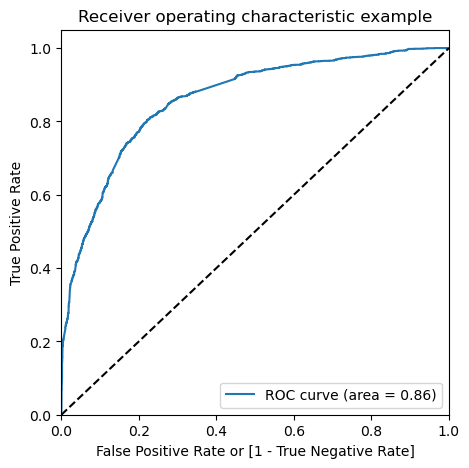

In [549]:
##Plotting the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
## The ROC is at 0.86 which is good. So the model seems to be good.

In [550]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
cutoff_df.index.name = 'cutoff'  # fixed: set an appropriate index name for clarity

from sklearn.metrics import confusion_matrix

# List of probability cutoffs
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Iterate over each cutoff value
for i in num:
    # Apply the cutoff to generate predictions
    y_train_pred_final['predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > i else 0)  
    # fixed: map the cutoff value to predictions
   
    # Calculate the confusion matrix
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
   
    # Calculate the total number of observations
    total1 = sum(sum(cm1))
   
    # Calculate accuracy
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
   
    # Calculate specificity
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
   
    # Calculate sensitivity
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
   
    # Append the results to the DataFrame
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

# Print the final DataFrame
print(cutoff_df)

        prob  accuracy     sensi     speci
cutoff                                    
0.0      0.0  0.481731  1.000000  0.000000
0.1      0.1  0.536651  0.993485  0.112024
0.2      0.2  0.691773  0.943229  0.458045
0.3      0.3  0.767765  0.874826  0.668253
0.4      0.4  0.789509  0.808748  0.771626
0.5      0.5  0.786819  0.737552  0.832612
0.6      0.6  0.762161  0.635179  0.880190
0.7      0.7  0.736382  0.544439  0.914792
0.8      0.8  0.707016  0.443927  0.951557
0.9      0.9  0.643129  0.278734  0.981834


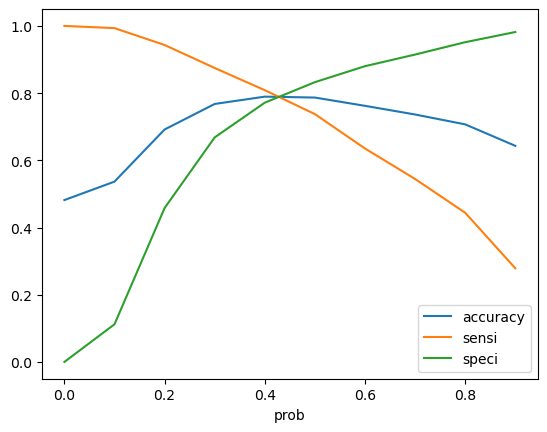

In [551]:
# plotting it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [552]:
##Precision and recall calculation
##Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[2270   42]
 [1550  599]]


In [553]:
##Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9344773790951638

In [554]:
##Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.27873429502094

In [555]:
##Making predictions on test set now
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [556]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,0,0,1,0,0,0


In [557]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,1,0,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,1,0,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,1,0,1,0,0,0,1,0,0,0


In [558]:
X_test.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [559]:
X_test.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [560]:
X_test.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [561]:
X_test.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [562]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [563]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [564]:
y_test_pred[:10]

4771    0.996464
6122    0.141243
9202    0.718042
6570    0.309731
2668    0.732433
4233    0.818714
3368    0.646558
9091    0.483254
5972    0.301563
3631    0.796734
dtype: float64

In [565]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4771,0.996464
6122,0.141243
9202,0.718042
6570,0.309731
2668,0.732433


In [566]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [567]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [568]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [569]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996464
1,0,0.141243
2,0,0.718042
3,1,0.309731
4,1,0.732433


In [570]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [571]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996464
1,0,0.141243
2,0,0.718042
3,1,0.309731
4,1,0.732433


In [612]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [613]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996464,1
1,0,0.141243,0
2,0,0.718042,1
3,1,0.309731,0
4,1,0.732433,1


In [614]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7855648535564853

In [615]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[779, 217],
       [193, 723]], dtype=int64)

In [616]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculate Precision

TP/(TP+FP)


0.7691489361702127

In [617]:
# Calculate Recall

TP/(TP+FN)

0.7893013100436681

In [618]:
##Lead Scoring on test set

In [619]:
scores = pd.DataFrame({
    'lead_score':(y_train_pred_final['Converted']*100).astype(int),
    'predicted_outcome':Conversion_Prob, 
    'actual_outcome': y_pred_final
}).reset_index(drop=True)
print(scores)

NameError: name 'Conversion_Prob' is not defined